Let's test things out on a single target: HIP 65426

In [1]:
from jwst import *

%load_ext autoreload
%autoreload 2


In [2]:
age = 100 #Myr
distance = 104 #pc
spt = "A0V"
kmag = 5.8

# First let's try to get the JWST mag in a given filter

In [3]:
# os.environ['PYSYN_CDBS']='/Users/maxwellmb/Data/pysynphot_data/'

instrument='nircam'
instrument_mask = 'mask335r'
jwst_filt = 'f444w'

jwst_mag = get_jwst_mag(spt,kmag,instrument,jwst_filt,filter_dir="./",jwst_mask=instrument_mask,
                norm_filter='bessel_k').value

That seems reasonable! Now, read in the contrast curve for the desired filter and plot minimum detectable planet magnitude.

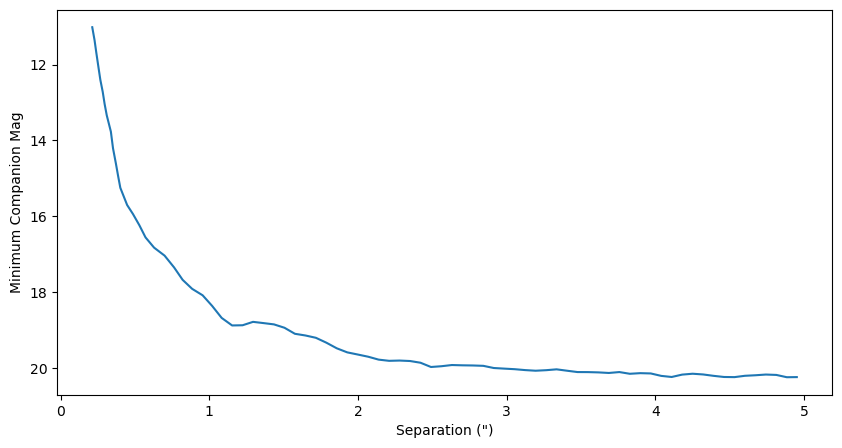

In [4]:
contrast_curves=read_contrast_curves()
sep,companion_mags=companion_detection_limit(jwst_mag,jwst_filt,contrast_curves);

Read evolution model track for the desired filter and generate a mass function. Then plot minimum detectable planet mass for a given separation.

/Users/maxwellmb/Dropbox (Personal)/Library/Python/contraster/testing/models.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(masses)[sorted_by_mass], np.array(age_list)[sorted_by_mass], np.array(mag_list)[sorted_by_mass]


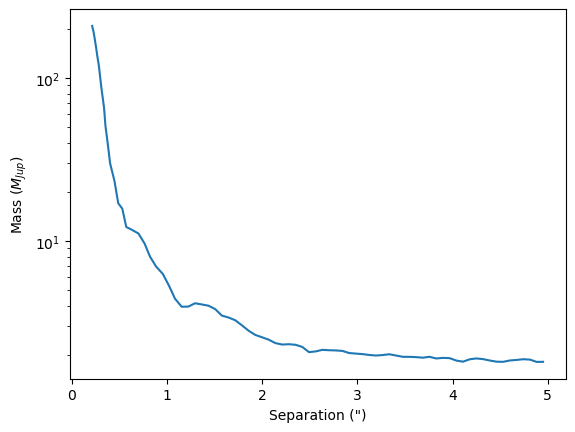

In [5]:
model_dir="/Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/"
# model_dir=""
model_dir+=instrument_directories.get(instrument.lower())+model_nircam_mask_directories.get(instrument_mask.lower())

generate_mass_curve(age,distance,companion_mags,jwst_filt,sep,model_dir);


# Resetting properties

In [15]:
age = 1000 #Myr
distance = 20 #pc
spt = "A0V"
kmag = 5.8
comp_sep = 0.8 #Companion separation in arcseconds
comp_mass = 0.8 #Companions mass in M_Jup

filter_list = ['f250m','f300m','f356w','f410m','f444w','f1140c','f1550c']
instrument='nircam'
instrument_mask = 'mask335r'
jwst_filt = 'f444w'


configs = {'f250m':  {'instrument':'nircam','instrument_mask':'mask335r'},
            'f300m': {'instrument':'nircam','instrument_mask':'mask335r'}, 
            'f356w': {'instrument':'nircam','instrument_mask':'mask335r'},
            'f410m': {'instrument':'nircam','instrument_mask':'mask335r'},
            'f444w': {'instrument':'nircam','instrument_mask':'mask335r'},
            'f1140c':{'instrument':'miri',  'instrument_mask':None},
            'f1550c':{'instrument':'miri',  'instrument_mask':None},
            }
filter_list = list(configs.keys())


In [16]:
filter_list

['f250m', 'f300m', 'f356w', 'f410m', 'f444w', 'f1140c', 'f1550c']

In [20]:
mass_limits_list = []
sep_list = []

for filter_name in filter_list:
    
    instrument = configs[filter_name]['instrument']
    instrument_mask = configs[filter_name]['instrument_mask']

    jwst_mag = get_jwst_mag(spt,kmag,instrument,filter_name,filter_dir="./",jwst_mask=instrument_mask,
                norm_filter='bessel_k').value

    contrast_curves=read_contrast_curves()
    sep,companion_mags=companion_detection_limit(jwst_mag,filter_name,contrast_curves,plot=False);


    model_dir="/Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/"
    model_dir+=model_instrument_directories.get(instrument.lower())
    
    if instrument.lower () == "nircam":
        model_dir+=model_nircam_mask_directories.get(instrument_mask.lower())

    print(filter_name, model_dir)
    mass_limits = generate_mass_curve(age,distance,companion_mags,filter_name,sep,model_dir,plot=False)

    mass_limits_list.append(mass_limits)
    sep_list.append(sep)


f250m /Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/JWST_coronagraphy/JWST_coron_NIRCAM_MASK335R/


/Users/maxwellmb/Dropbox (Personal)/Library/Python/contraster/testing/models.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(masses)[sorted_by_mass], np.array(age_list)[sorted_by_mass], np.array(mag_list)[sorted_by_mass]


f300m /Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/JWST_coronagraphy/JWST_coron_NIRCAM_MASK335R/
f356w /Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/JWST_coronagraphy/JWST_coron_NIRCAM_MASK335R/
f410m /Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/JWST_coronagraphy/JWST_coron_NIRCAM_MASK335R/
f444w /Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/JWST_coronagraphy/JWST_coron_NIRCAM_MASK335R/
f1140c /Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/JWST_coronagraphy/JWST_coron_MIRI/
f1550c /Users/maxwellmb/Data/ATMO2020/evolutionary_tracks/ATMO_CEQ/JWST_coronagraphy/JWST_coron_MIRI/


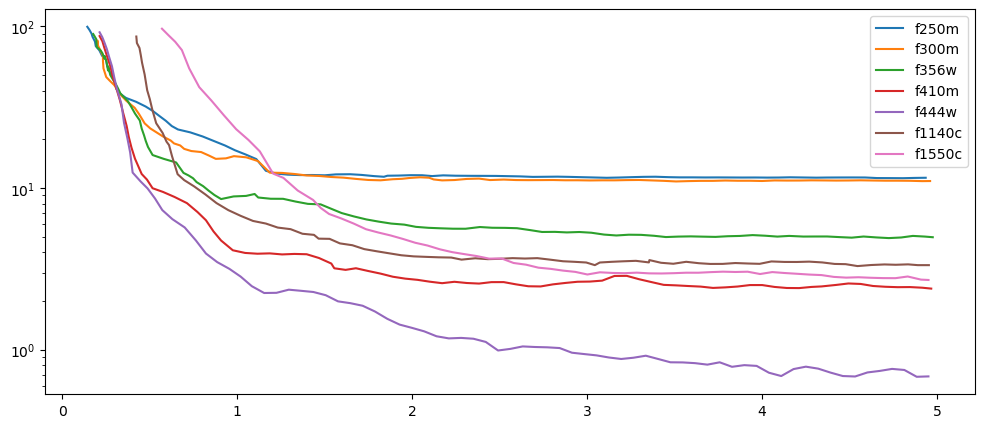

In [19]:
plt.figure(figsize=(12,5))
for i in range(len(mass_limits_list)):
    plt.semilogy(sep_list[i],mass_limits_list[i],label=filter_list[i])
plt.scatter(comp_sep,comp_mass)
plt.legend()

'f250m'